In [19]:
import pandas as pd
base = pd.read_csv('echocardiogram.csv')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import cross_val_score
from collections import Counter

base.drop('name', 1, inplace=True)
base.drop('group', 1, inplace=True)
base.drop('mult', 1, inplace=True)
base.drop('wall_motion_score', 1, inplace=True)

base.drop(base[base.survival == '?'].index, inplace=True)
base.loc[base['age_at_heart_attack'] == '0', 'age_at_heart_attack'] = int(0)
base.loc[base['age_at_heart_attack'] == '62.529', 'age_at_heart_attack'] = 62
teste = base['age_at_heart_attack'].values
base['age_at_heart_attack'] = base['age_at_heart_attack'].astype(str)
base.drop(base[base.alive_at_1 == '?'].index, inplace=True)

X_df = base[['survival','still_alive','age_at_heart_attack','pericardial_effusion','fractional_shortening','epss','lvdd','wall_motion_index']]
Y_df = base['alive_at_1']

Xdummies_df = pd.get_dummies(X_df).astype(int)
Ydummies_df = Y_df

X = Xdummies_df.values
Y = Ydummies_df.values

porcentagem_de_treino = 0.8

tamanho_de_treino = int(porcentagem_de_treino * len(Y))

treino_dados = X[0:tamanho_de_treino]
treino_marcacoes = Y[0:tamanho_de_treino]

validacao_dados = X[tamanho_de_treino:]
validacao_marcacoes = Y[tamanho_de_treino:]


def fit_and_predict_kf(nome, modelo, treino_dados, treino_marcacoes):
    k = 5
    scores = cross_val_score(modelo, treino_dados, treino_marcacoes, cv = k)
    taxa_de_acerto = np.mean(scores)
    msg = "Taxa de acerto do {0}: {1}".format(nome, taxa_de_acerto)
    print(msg)
    return taxa_de_acerto


resultados = {}

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
modeloOneVsRest = OneVsRestClassifier(LinearSVC(random_state=0))
resultadoOneVsRest = fit_and_predict_kf("OneVsRest", modeloOneVsRest, treino_dados, treino_marcacoes)
resultados[resultadoOneVsRest] = modeloOneVsRest

from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
modeloOneVsOne = OneVsOneClassifier(LinearSVC(random_state=0))
resultadoOneVsOne = fit_and_predict_kf("OneVsOne", modeloOneVsOne, treino_dados, treino_marcacoes)
resultados[resultadoOneVsOne] = modeloOneVsOne

from sklearn.naive_bayes import MultinomialNB
modeloMultinomial = MultinomialNB()
resultadoMultinomial = fit_and_predict_kf("MultinomialNB",modeloMultinomial, treino_dados, treino_marcacoes)
resultados[resultadoMultinomial] = modeloMultinomial

from sklearn.ensemble import AdaBoostClassifier
modeloAdaBoost = AdaBoostClassifier()
resultadoAdaBoost = fit_and_predict_kf("AdaBoostClassifier",modeloAdaBoost, treino_dados, treino_marcacoes)
resultados[resultadoAdaBoost] = modeloAdaBoost

from sklearn.naive_bayes import GaussianNB
modeloGaussianNB = GaussianNB()
resultadoGaussianNB = fit_and_predict_kf("GaussianNB", modeloGaussianNB, treino_dados, treino_marcacoes)
resultados[resultadoGaussianNB] = modeloGaussianNB

from sklearn.ensemble import RandomForestClassifier
modeloRandomForestClassifier = RandomForestClassifier()
resultadoRandomForestClassifier = fit_and_predict_kf("RandomForestClassifier", modeloRandomForestClassifier, treino_dados, treino_marcacoes)
resultados[resultadoRandomForestClassifier] = modeloRandomForestClassifier
# print(resultados)


maximo = max(resultados)
vencedor = resultados[maximo]
print("========== V E N C E D O R ==========")
print(vencedor)

vencedor.fit(treino_dados, treino_marcacoes)
resultado = vencedor.predict(validacao_dados)
acertos = resultado == validacao_marcacoes

total_de_acertos = sum(acertos)
total_de_elementos = len(validacao_marcacoes)

taxa_de_acertos = 100.0 * total_de_acertos / total_de_elementos
print("Taxa de acerto do vencedor com dados de validação he: {0}".format(taxa_de_acertos))

acerto_base = max(Counter(validacao_marcacoes).values())
taxa_de_acerto_base = 100.0 * acerto_base / len(validacao_marcacoes)
print("Taxa de acerto base: {}".format(taxa_de_acerto_base))

print("Total de elementos: {}".format(len(validacao_dados)))

num_casos_0 = len(base[base['alive_at_1'] == '0'])
num_casos_1 = len(base[base['alive_at_1'] == '1'])
total = num_casos_0 + num_casos_1
print('Número de casos 0 (pacientes mortos): {0} ({1:2.2f}%)'.format(num_casos_0,(num_casos_0/total) * 100))
print('Número de casos 1 (pacientes vivos): {0} ({1:2.2f}%)'.format(num_casos_1,(num_casos_1/total) * 100))

Taxa de acerto do OneVsRest: 0.9315850815850816
Taxa de acerto do OneVsOne: 0.9315850815850816
Taxa de acerto do MultinomialNB: 0.877039627039627
Taxa de acerto do AdaBoostClassifier: 0.8252913752913754
Taxa de acerto do GaussianNB: 0.8268065268065268
Taxa de acerto do RandomForestClassifier: 0.8073426573426573
========== V E N C E D O R ==========
OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1)
Taxa de acerto do vencedor com dados de validação he: 93.33333333333333
Taxa de acerto base: 53.333333333333336
Total de elementos: 15
Número de casos 0 (pacientes mortos): 50 (68.49%)
Número de casos 1 (pacientes vivos): 23 (31.51%)


In [23]:
base

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,wall_motion_index,alive_at_1
0,11,0,71,0,0.26,9,4.6,1,0
1,19,0,72,0,0.38,6,4.1,1.7,0
2,16,0,55,0,0.26,4,3.42,1,0
3,57,0,60,0,0.253,12.062,4.603,1.45,0
4,19,1,57,0,0.16,22,5.75,2.25,0
5,26,0,68,0,0.26,5,4.31,1,0
6,13,0,62,0,0.23,31,5.43,1.875,0
7,50,0,60,0,0.33,8,5.25,1,0
8,19,0,46,0,0.34,0,5.09,1.14,0
9,25,0,54,0,0.14,13,4.49,1.19,0


In [24]:
correlations = base.corr
print(correlations)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = ['survival', 'still_alive', 'age_at_heart_attack', 'pericardial_effusion','fractional_shortening','epss','lvdd','wall_motion_index', 'alive_at_1']
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

<bound method DataFrame.corr of     survival still_alive age_at_heart_attack pericardial_effusion  \
0         11           0                  71                    0   
1         19           0                  72                    0   
2         16           0                  55                    0   
3         57           0                  60                    0   
4         19           1                  57                    0   
5         26           0                  68                    0   
6         13           0                  62                    0   
7         50           0                  60                    0   
8         19           0                  46                    0   
9         25           0                  54                    0   
10        10           1                  77                    0   
11        52           0                  62                    1   
12        52           0                  73                    0   
13

ValueError: not enough values to unpack (expected 2, got 0)

In [25]:
base.columns

Index(['survival', 'still_alive', 'age_at_heart_attack',
       'pericardial_effusion', 'fractional_shortening', 'epss', 'lvdd',
       'wall_motion_index', 'alive_at_1'],
      dtype='object')

In [27]:
base.corr()

""


In [30]:
base.corr(method='kendall', min_periods=1)

""


In [31]:
base.dtypes

survival                 object
still_alive              object
age_at_heart_attack      object
pericardial_effusion     object
fractional_shortening    object
epss                     object
lvdd                     object
wall_motion_index        object
alive_at_1               object
dtype: object

In [42]:
df = base

In [35]:
df['survival'] = df['survival'].astype(float)

In [37]:
df.head(5)

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,wall_motion_index,alive_at_1
0,11.0,0,71,0,0.26,9,4.6,1,0
1,19.0,0,72,0,0.38,6,4.1,1.7,0
2,16.0,0,55,0,0.26,4,3.42,1,0
3,57.0,0,60,0,0.253,12.062,4.603,1.45,0
4,19.0,1,57,0,0.16,22,5.75,2.25,0


In [49]:
df = df[df.age_at_heart_attack != '?']
df.dropna()

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,wall_motion_index,alive_at_1
0,11.00,0,11,0,0.26,9,4.6,1,0
1,19.00,0,19,0,0.38,6,4.1,1.7,0
2,16.00,0,16,0,0.26,4,3.42,1,0
3,57.00,0,57,0,0.253,12.062,4.603,1.45,0
4,19.00,1,19,0,0.16,22,5.75,2.25,0
5,26.00,0,26,0,0.26,5,4.31,1,0
6,13.00,0,13,0,0.23,31,5.43,1.875,0
7,50.00,0,50,0,0.33,8,5.25,1,0
8,19.00,0,19,0,0.34,0,5.09,1.14,0
9,25.00,0,25,0,0.14,13,4.49,1.19,0


In [59]:
df = df[df['epss'] != '?']
df = df[df['lvdd'] != '?']
df = df[df['wall_motion_index'] != '?']
df = df[df['alive_at_1'] != '?']

In [60]:
df['epss'] = df['epss'].astype(float)
df['lvdd'] = df['lvdd'].astype(float)
df['wall_motion_index'] = df['wall_motion_index'].astype(float)
df['alive_at_1'] = df['alive_at_1'].astype(int)


In [64]:
df.dtypes

survival                 float64
still_alive                int64
age_at_heart_attack      float64
pericardial_effusion       int64
fractional_shortening    float64
epss                     float64
lvdd                     float64
wall_motion_index        float64
alive_at_1                 int64
dtype: object

In [65]:
df.corr()

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,wall_motion_index,alive_at_1
survival,1.000000,-0.685545,1.000000,-0.090832,0.223220,-0.327590,-0.259275,-0.377383,-0.742478
still_alive,-0.685545,1.000000,-0.676503,0.096780,-0.369062,0.358909,0.417907,0.470450,0.862439
age_at_heart_attack,1.000000,-0.676503,1.000000,-0.102032,0.234647,-0.314290,-0.264422,-0.357295,-0.734373
pericardial_effusion,-0.090832,0.096780,-0.102032,1.000000,-0.009473,-0.041652,-0.037207,0.133942,0.168025
fractional_shortening,0.223220,-0.369062,0.234647,-0.009473,1.000000,-0.391631,-0.376343,-0.311707,-0.254758
epss,-0.327590,0.358909,-0.314290,-0.041652,-0.391631,1.000000,0.563158,0.455535,0.304116
lvdd,-0.259275,0.417907,-0.264422,-0.037207,-0.376343,0.563158,1.000000,0.334175,0.295847
wall_motion_index,-0.377383,0.470450,-0.357295,0.133942,-0.311707,0.455535,0.334175,1.000000,0.475108
alive_at_1,-0.742478,0.862439,-0.734373,0.168025,-0.254758,0.304116,0.295847,0.475108,1.000000


                       survival  still_alive  age_at_heart_attack  \
survival               1.000000    -0.685545             1.000000   
still_alive           -0.685545     1.000000            -0.676503   
age_at_heart_attack    1.000000    -0.676503             1.000000   
pericardial_effusion  -0.090832     0.096780            -0.102032   
fractional_shortening  0.223220    -0.369062             0.234647   
epss                  -0.327590     0.358909            -0.314290   
lvdd                  -0.259275     0.417907            -0.264422   
wall_motion_index     -0.377383     0.470450            -0.357295   
alive_at_1            -0.742478     0.862439            -0.734373   

                       pericardial_effusion  fractional_shortening      epss  \
survival                          -0.090832               0.223220 -0.327590   
still_alive                        0.096780              -0.369062  0.358909   
age_at_heart_attack               -0.102032               0.234647 -0

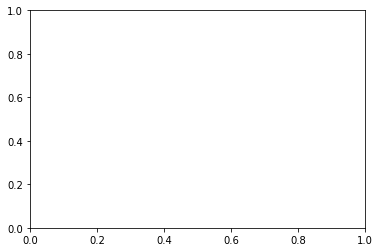

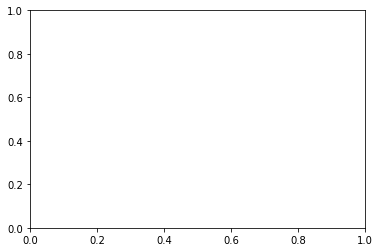

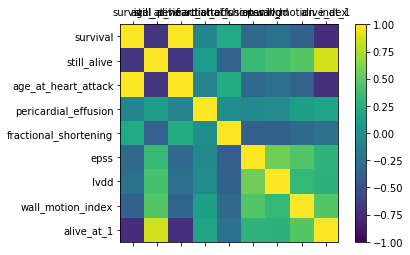

In [66]:
correlations = df.corr()
print(correlations)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = ['survival', 'still_alive', 'age_at_heart_attack', 'pericardial_effusion','fractional_shortening','epss','lvdd','wall_motion_index', 'alive_at_1']
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [67]:
df.drop('survival', 1, inplace=True)

In [69]:
df.drop('age_at_heart_attack', 1, inplace=True)

In [70]:
df.drop('fractional_shortening', 1, inplace=True)

In [71]:
df

,still_alive,pericardial_effusion,epss,lvdd,wall_motion_index,alive_at_1
0,0,0,9.000,4.600,1.000,0
1,0,0,6.000,4.100,1.700,0
2,0,0,4.000,3.420,1.000,0
3,0,0,12.062,4.603,1.450,0
4,1,0,22.000,5.750,2.250,0
5,0,0,5.000,4.310,1.000,0
6,0,0,31.000,5.430,1.875,0
7,0,0,8.000,5.250,1.000,0
8,0,0,0.000,5.090,1.140,0
9,0,0,13.000,4.490,1.190,0


In [73]:
base = df

X_df = base[['still_alive','pericardial_effusion','epss','lvdd','wall_motion_index']]
Y_df = base['alive_at_1']

Xdummies_df = pd.get_dummies(X_df).astype(int)
Ydummies_df = Y_df

X = Xdummies_df.values
Y = Ydummies_df.values

porcentagem_de_treino = 0.8

tamanho_de_treino = int(porcentagem_de_treino * len(Y))

treino_dados = X[0:tamanho_de_treino]
treino_marcacoes = Y[0:tamanho_de_treino]

validacao_dados = X[tamanho_de_treino:]
validacao_marcacoes = Y[tamanho_de_treino:]


def fit_and_predict_kf(nome, modelo, treino_dados, treino_marcacoes):
    k = 5
    scores = cross_val_score(modelo, treino_dados, treino_marcacoes, cv = k)
    taxa_de_acerto = np.mean(scores)
    msg = "Taxa de acerto do {0}: {1}".format(nome, taxa_de_acerto)
    print(msg)
    return taxa_de_acerto


resultados = {}

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
modeloOneVsRest = OneVsRestClassifier(LinearSVC(random_state=0))
resultadoOneVsRest = fit_and_predict_kf("OneVsRest", modeloOneVsRest, treino_dados, treino_marcacoes)
resultados[resultadoOneVsRest] = modeloOneVsRest

from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
modeloOneVsOne = OneVsOneClassifier(LinearSVC(random_state=0))
resultadoOneVsOne = fit_and_predict_kf("OneVsOne", modeloOneVsOne, treino_dados, treino_marcacoes)
resultados[resultadoOneVsOne] = modeloOneVsOne

from sklearn.naive_bayes import MultinomialNB
modeloMultinomial = MultinomialNB()
resultadoMultinomial = fit_and_predict_kf("MultinomialNB",modeloMultinomial, treino_dados, treino_marcacoes)
resultados[resultadoMultinomial] = modeloMultinomial

from sklearn.ensemble import AdaBoostClassifier
modeloAdaBoost = AdaBoostClassifier()
resultadoAdaBoost = fit_and_predict_kf("AdaBoostClassifier",modeloAdaBoost, treino_dados, treino_marcacoes)
resultados[resultadoAdaBoost] = modeloAdaBoost

from sklearn.naive_bayes import GaussianNB
modeloGaussianNB = GaussianNB()
resultadoGaussianNB = fit_and_predict_kf("GaussianNB", modeloGaussianNB, treino_dados, treino_marcacoes)
resultados[resultadoGaussianNB] = modeloGaussianNB

from sklearn.ensemble import RandomForestClassifier
modeloRandomForestClassifier = RandomForestClassifier()
resultadoRandomForestClassifier = fit_and_predict_kf("RandomForestClassifier", modeloRandomForestClassifier, treino_dados, treino_marcacoes)
resultados[resultadoRandomForestClassifier] = modeloRandomForestClassifier
# print(resultados)


maximo = max(resultados)
vencedor = resultados[maximo]
print("========== V E N C E D O R ==========")
print(vencedor)

vencedor.fit(treino_dados, treino_marcacoes)
resultado = vencedor.predict(validacao_dados)
acertos = resultado == validacao_marcacoes

total_de_acertos = sum(acertos)
total_de_elementos = len(validacao_marcacoes)

taxa_de_acertos = 100.0 * total_de_acertos / total_de_elementos
print("Taxa de acerto do vencedor com dados de validação he: {0}".format(taxa_de_acertos))

acerto_base = max(Counter(validacao_marcacoes).values())
taxa_de_acerto_base = 100.0 * acerto_base / len(validacao_marcacoes)
print("Taxa de acerto base: {}".format(taxa_de_acerto_base))

print("Total de elementos: {}".format(len(validacao_dados)))



Taxa de acerto do OneVsRest: 0.9636363636363636
Taxa de acerto do OneVsOne: 0.9636363636363636
Taxa de acerto do MultinomialNB: 0.8343434343434343
Taxa de acerto do AdaBoostClassifier: 0.901010101010101
Taxa de acerto do GaussianNB: 0.9414141414141414
Taxa de acerto do RandomForestClassifier: 0.9232323232323232
========== V E N C E D O R ==========
OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1)
Taxa de acerto do vencedor com dados de validação he: 92.3076923076923
Taxa de acerto base: 53.84615384615385
Total de elementos: 13
